# CAPSTONE PROJECT

In [1]:
import pandas as pd
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import interact
from pandas.api.types import CategoricalDtype

In [2]:
COL_NAME_HTL = 'Hotel'
COL_NAME_LEAD_TIME = 'Lead Time'
COL_NAME_ARR_DATE_D = 'Arrival Date Day'
COL_NAME_ARR_DATE_M = 'Arrival Date Month'
COL_NAME_ARR_DATE_Y = 'Arrival Date Year'
COL_NAME_ARR_DATE = 'Arrival Date'
COL_NAME_ADT = 'Adults'
COL_NAME_CHLDN = 'Children'
COL_NAME_CNTRY = 'Country'
COL_NAME_MKT_SEG = 'Market Segment'
COL_NAME_AGT = 'Agent'
COL_NAME_CUST_TYPE = 'Customer Type'
COL_NAME_AVG_DLY_RATE = 'Average Daily Rate'
COL_NAME_CNTRY_NAME = 'Country Name'

In [3]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [4]:
df = pd.read_csv('data_valid.csv')
country_codes_df = pd.read_excel('country_codes_list.xlsx')
merged_df = pd.merge(df, country_codes_df, on=COL_NAME_CNTRY, how='left')

In [5]:
df[COL_NAME_AGT] = df[COL_NAME_AGT].astype(str)

In [6]:
# Create dropdown
def crt_dropdown(col_name, desc):
    list = df[col_name].unique().tolist()
    list.append('All')
    return widgets.Dropdown(
        options=list,
        value='All',
        description=f'{desc}: ',
        style={'description_width': 'initial'},
        layout={'width': '15%', 'margin': '0 auto'})

In [7]:
# Column by object output
def col_by_obj_output(obj, col_by_cht_op, col_by_obj, col_name, desc):
    with col_by_cht_op:
        col_by_cht_op.clear_output(wait=True)
        col_by_obj(obj, col_name, desc)

In [8]:
# Draw chart
def draw_cht(obj, dropdown, col_by_obj, col_name, desc):
    col_by_obj_cht_op = widgets.Output()
    col_by_obj_db = widgets.VBox([dropdown, col_by_obj_cht_op])
    col_by_obj_db.layout.align_items = 'center'
    col_by_obj_output(obj, col_by_obj_cht_op, col_by_obj, col_name, desc)
    display(col_by_obj_db)
    dropdown.observe(lambda change: col_by_obj_output(change.new, col_by_obj_cht_op, col_by_obj, col_name, desc), names='value')

In [9]:
year_dropdown = crt_dropdown(COL_NAME_ARR_DATE_Y, 'Year')
mkt_seg_dropdown = crt_dropdown(COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)
cust_type_dropdown = crt_dropdown(COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [10]:
df[COL_NAME_HTL].describe()

count          79536
unique             2
top       City Hotel
freq           51765
Name: Hotel, dtype: object

In [11]:
# Hotel by object
def htl_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    hotel_counts = df_filtered[COL_NAME_HTL].value_counts()
    _, ax = plt.subplots()
    wedges, _, _ = ax.pie(hotel_counts, labels=hotel_counts.index, wedgeprops=dict(width=0.7), counterclock=False, colors=sns.color_palette('Set2'), autopct='%1.1f%%', pctdistance=0.75)
    p = plt.gcf()
    p.gca().add_artist(plt.Circle((0, 0), 0.5, color='white'))
    plt.setp(wedges, edgecolor='white', linewidth=1.5)
    ax.set_title(f'Donut chart of {COL_NAME_HTL} by {desc} ({obj})')
    plt.show()

In [12]:
draw_cht('All', year_dropdown, htl_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [13]:
draw_cht('All', mkt_seg_dropdown, htl_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [14]:
draw_cht('All', cust_type_dropdown, htl_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [15]:
df[COL_NAME_LEAD_TIME].describe()

count    79536.000000
mean        82.882167
std         86.205572
min          0.000000
25%         14.000000
50%         54.000000
75%        129.000000
max        709.000000
Name: Lead Time, dtype: float64

In [16]:
# Lead Time by object
def lead_time_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    plt.hist(data=df_filtered, x='Lead Time', bins=24, range=(0, 720), color='#86bf91', edgecolor='black')
    plt.xlabel(COL_NAME_LEAD_TIME)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {COL_NAME_LEAD_TIME} by {desc} ({obj})')
    plt.xticks(range(0, 730, 90))
    plt.grid(alpha=0.3)
    plt.show()

In [17]:
draw_cht('All', year_dropdown, lead_time_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [18]:
draw_cht('All', mkt_seg_dropdown, lead_time_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [19]:
draw_cht('All', cust_type_dropdown, lead_time_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [20]:
df[COL_NAME_ARR_DATE_D].describe()

count    79536.000000
mean        15.837885
std          8.850068
min          1.000000
25%          8.000000
50%         16.000000
75%         24.000000
max         31.000000
Name: Arrival Date Day, dtype: float64

In [21]:
df[COL_NAME_ARR_DATE_M].describe()

count      79536
unique        12
top       August
freq       11026
Name: Arrival Date Month, dtype: object

In [22]:
# Arrival by object
def arr_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    _, (ax1, ax2) = plt.subplots(2, 1)
    df_filtered[COL_NAME_ARR_DATE_D].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), color='#86bf91', edgecolor='black', ax=ax1)
    ax1.set_xlabel(COL_NAME_ARR_DATE_D)
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Bar plot of {COL_NAME_ARR_DATE_D} by {desc} ({obj})')
    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    ax1.grid(alpha=0.3)
    df_filtered[COL_NAME_ARR_DATE_M].astype(CategoricalDtype(categories=month_order, ordered=True)).value_counts().sort_index().plot(kind='bar', color='#86bf91', edgecolor='black', ax=ax2)
    ax2.set_xlabel(COL_NAME_ARR_DATE_M)
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Bar plot of {COL_NAME_ARR_DATE_M} by {desc} ({obj})')
    ax2.grid(alpha=0.3)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

In [23]:
draw_cht('All', year_dropdown, arr_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [24]:
draw_cht('All', mkt_seg_dropdown, arr_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [25]:
draw_cht('All', cust_type_dropdown, arr_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [26]:
df[COL_NAME_ARR_DATE_Y].describe()

count    79536.000000
mean      2016.227092
std          0.682190
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: Arrival Date Year, dtype: float64

In [27]:
# Arrival Date Year by object
def arr_date_year_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    df_filtered[COL_NAME_ARR_DATE_Y].value_counts().sort_index().plot(kind='bar', color='#86bf91', edgecolor='black')
    plt.xlabel(COL_NAME_ARR_DATE_Y)
    plt.ylabel('Frequency')
    plt.title(f'Bar plot of {COL_NAME_ARR_DATE_Y} by {desc} ({obj})')
    plt.xticks(rotation=0)
    plt.grid(alpha=0.3)
    plt.show()

In [28]:
draw_cht('All', mkt_seg_dropdown, arr_date_year_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [29]:
draw_cht('All', cust_type_dropdown, arr_date_year_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [30]:
df[COL_NAME_CNTRY].describe()

count     79536
unique      175
top         PRT
freq      23142
Name: Country, dtype: object

In [31]:
# Country by object
def cntry_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = merged_df
    else:
        df_filtered = merged_df[merged_df[col_name] == obj]
    df_filtered[COL_NAME_CNTRY_NAME].value_counts().head(10).plot(kind='bar', color='#86bf91', edgecolor='black')
    plt.xlabel(COL_NAME_CNTRY)
    plt.ylabel('Number of bookings')
    plt.title(f'Top 10 Countries with highest number of bookings by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [32]:
draw_cht('All', year_dropdown, cntry_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [33]:
draw_cht('All', mkt_seg_dropdown, cntry_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [34]:
draw_cht('All', cust_type_dropdown, cntry_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [35]:
df[COL_NAME_ADT].describe()

count    79536.000000
mean         1.913310
std          0.481261
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: Adults, dtype: float64

In [36]:
df[COL_NAME_CHLDN].describe()

count    79536.000000
mean         0.144136
std          0.460901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: Children, dtype: float64

In [37]:
# Guest by object
def guest_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    df_filtered[COL_NAME_ADT].value_counts().sort_index().plot(kind='bar', color='#86bf91', edgecolor='black', ax=ax1)
    ax1.set_xlabel(f'Number of {COL_NAME_ADT}')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Bar plot of number of {COL_NAME_ADT} by {desc} ({obj})')
    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    ax1.grid(alpha=0.3)
    df_filtered[COL_NAME_CHLDN].value_counts().sort_index().plot(kind='bar', color='#86bf91', edgecolor='black', ax=ax2)
    ax2.set_xlabel(f'Number of {COL_NAME_CHLDN}')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Bar plot of number of {COL_NAME_CHLDN} by {desc} ({obj})')
    ax2.set_xticks(ax2.get_xticks())
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    ax2.grid(alpha=0.3)
    plt.show()

In [38]:
draw_cht('All', year_dropdown, guest_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [39]:
draw_cht('All', mkt_seg_dropdown, guest_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [40]:
draw_cht('All', cust_type_dropdown, guest_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [41]:
df[COL_NAME_MKT_SEG].describe()

count         79536
unique            7
top       Online TA
freq          49564
Name: Market Segment, dtype: object

In [42]:
# Market Segment by object
def mrk_seg_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    df_filtered[COL_NAME_MKT_SEG].value_counts().plot(kind='bar', color='#86bf91', edgecolor='black')
    plt.xlabel(COL_NAME_MKT_SEG)
    plt.ylabel('Frequency')
    plt.title(f'Bar plot of {COL_NAME_MKT_SEG} by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [43]:
draw_cht('All', year_dropdown, mrk_seg_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [44]:
draw_cht('All', cust_type_dropdown, mrk_seg_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [45]:
df[COL_NAME_AGT].describe()

count     79536
unique      324
top           9
freq      28438
Name: Agent, dtype: object

In [46]:
# Agent by object
def agt_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    df_filtered[COL_NAME_AGT].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', color='#86bf91', edgecolor='black')
    plt.xlabel(COL_NAME_AGT)
    plt.ylabel('Number of bookings')
    plt.title(f'Top 10 Agents with highest number of bookings by {desc} by ({obj})')
    plt.xticks(rotation=0)
    plt.grid(alpha=0.3)
    plt.show()

In [47]:
draw_cht('All', year_dropdown, agt_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [48]:
draw_cht('All', mkt_seg_dropdown, agt_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [49]:
draw_cht('All', cust_type_dropdown, agt_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [50]:
df[COL_NAME_CUST_TYPE].describe()

count         79536
unique            4
top       Transient
freq          65915
Name: Customer Type, dtype: object

In [51]:
# Customer Type by object
def cust_type_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    df_filtered[COL_NAME_CUST_TYPE].value_counts().plot(kind='bar', color='#86bf91', edgecolor='black')
    plt.xlabel(COL_NAME_CUST_TYPE)
    plt.ylabel('Frequency')
    plt.title(f'Bar plot of {COL_NAME_CUST_TYPE} by {desc} ({obj})')
    plt.xticks(rotation=0)
    plt.grid(alpha=0.3)
    plt.show()

In [52]:
draw_cht('All', year_dropdown, cust_type_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [53]:
draw_cht('All', mkt_seg_dropdown, cust_type_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [54]:
df[COL_NAME_AVG_DLY_RATE].describe()

count    79536.000000
mean       113.919918
std         47.801892
min         45.050000
25%         79.200000
50%        104.000000
75%        138.550000
max        510.000000
Name: Average Daily Rate, dtype: float64

In [55]:
# Average Daily Rate by object
def avg_dly_rate_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    df_filtered[COL_NAME_AVG_DLY_RATE].hist(bins=22, range=(0, 550), color='#86bf91', edgecolor='black')
    plt.xlabel(COL_NAME_AVG_DLY_RATE)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {COL_NAME_AVG_DLY_RATE} by {desc} ({obj})')
    plt.xticks(range(0, 560, 50))
    plt.grid(alpha=0.3)
    plt.show()

In [56]:
draw_cht('All', year_dropdown, avg_dly_rate_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [57]:
draw_cht('All', mkt_seg_dropdown, avg_dly_rate_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [58]:
draw_cht('All', cust_type_dropdown, avg_dly_rate_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [59]:
# Hotel & Lead Time by object
def htl_lead_time_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    sns.kdeplot(data=df_filtered, x=COL_NAME_LEAD_TIME, hue=COL_NAME_HTL, fill=True, palette=list(reversed(sns.color_palette('Set2', n_colors=len(df[COL_NAME_HTL].unique())))))
    plt.title(f'Kernel density estimation of {COL_NAME_LEAD_TIME} and {COL_NAME_HTL} by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [60]:
draw_cht('All', year_dropdown, htl_lead_time_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [61]:
# Hotel & Arrival by object
def htl_arr_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.lineplot(x=COL_NAME_ARR_DATE_D, y='Booking Count', hue=COL_NAME_HTL, data=df_filtered.groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_D]).size().reset_index(name='Booking Count'), palette='Set2', ax=ax1)
    ax1.set_title(f'Line plot of booking count of {COL_NAME_HTL} and {COL_NAME_ARR_DATE_D} by {desc} ({obj})')
    ax1.grid(alpha=0.3)
    htl_month_df = df_filtered.groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_M]).size().reset_index(name='Booking Count')
    htl_month_df[COL_NAME_ARR_DATE_M] = pd.Categorical(htl_month_df[COL_NAME_ARR_DATE_M], categories=month_order, ordered=True)
    htl_month_df = htl_month_df.sort_values([COL_NAME_ARR_DATE_M])
    sns.lineplot(x=COL_NAME_ARR_DATE_M, y='Booking Count', hue=COL_NAME_HTL, data=htl_month_df, palette='Set2', ax=ax2)
    ax2.set_title(f'Line plot of {COL_NAME_HTL} and {COL_NAME_ARR_DATE_M} by {desc} ({obj})')
    ax2.set_xticks(ax2.get_xticks())
    ax2.set_xticklabels(month_order, rotation=90)
    ax2.grid(alpha=0.3)
    plt.show()

In [62]:
draw_cht('All', year_dropdown, htl_arr_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [63]:
draw_cht('All', mkt_seg_dropdown, htl_arr_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [64]:
draw_cht('All', cust_type_dropdown, htl_arr_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [99]:
# Hotel & Arrival Date Year by object
def htl_arr_date_year_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    year_df = df_filtered.groupby([COL_NAME_HTL, COL_NAME_ARR_DATE_Y]).size().reset_index(name='Booking Count')
    year_df[COL_NAME_ARR_DATE_Y] = year_df[COL_NAME_ARR_DATE_Y]
    sns.catplot(x=COL_NAME_ARR_DATE_Y,
                y='Booking Count',
                hue=COL_NAME_HTL,
                data=year_df,
                kind='bar',
                palette='Set2')
    plt.title(f'Booking count of {COL_NAME_HTL} and {COL_NAME_ARR_DATE_Y} by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [100]:
draw_cht('All', mkt_seg_dropdown, htl_arr_date_year_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [67]:
draw_cht('All', cust_type_dropdown, htl_arr_date_year_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [68]:
# Hotel & guest by object
def htl_guest_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    children_df = df_filtered.groupby([COL_NAME_HTL])[COL_NAME_CHLDN].sum().reset_index(name=f'Total {COL_NAME_CHLDN}')
    adults_df = df_filtered.groupby([COL_NAME_HTL])[COL_NAME_ADT].sum().reset_index(name=f'Total {COL_NAME_ADT}')
    _, ax = plt.subplots()
    colors = sns.color_palette('Set2')
    autopct = '%1.1f%%'
    wedges_children, _, _ = ax.pie(children_df[f'Total {COL_NAME_CHLDN}'], wedgeprops=dict(width=0.6), counterclock=False, colors=colors, autopct=autopct, pctdistance=0.55)
    wedges_adults, _, _ = ax.pie(adults_df[f'Total {COL_NAME_ADT}'], wedgeprops=dict(width=0.3), counterclock=False, colors=colors, autopct=autopct, pctdistance=0.85)
    p=plt.gcf()
    p.gca().add_artist(plt.Circle((0,0), 0.4, color='white'))
    plt.setp(wedges_children, edgecolor='white', linewidth=1.5)
    plt.setp(wedges_adults, edgecolor='white', linewidth=1.5)
    ax.legend(wedges_adults, adults_df[COL_NAME_HTL], title=COL_NAME_HTL, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title(f'Total number of {COL_NAME_ADT} with {COL_NAME_CHLDN} and {COL_NAME_HTL} by {desc} ({obj})')
    plt.show()

In [69]:
draw_cht('All', year_dropdown, htl_guest_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [70]:
# Hotel & Country by object
def htl_cntry_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = merged_df
    else:
        df_filtered = merged_df[merged_df[col_name] == obj]
    top_10_countries = df_filtered.groupby(COL_NAME_CNTRY_NAME).size().sort_values(ascending=False).head(10).index
    sns.catplot(x=COL_NAME_CNTRY_NAME,
                y='Booking Count',
                hue=COL_NAME_HTL,
                data=df_filtered[df_filtered[COL_NAME_CNTRY_NAME].isin(top_10_countries)][[COL_NAME_HTL, COL_NAME_CNTRY_NAME]].groupby([COL_NAME_HTL, COL_NAME_CNTRY_NAME]).size().reset_index(name='Booking Count'),
                kind='bar',
                order=top_10_countries,
                palette='Set2')
    plt.title(f'Top 10 Countries by booking count for each {COL_NAME_HTL} by {desc} ({obj})')
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3)
    plt.show()

In [71]:
draw_cht('All', year_dropdown, htl_cntry_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [72]:
draw_cht('All', mkt_seg_dropdown, htl_cntry_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [73]:
draw_cht('All', cust_type_dropdown, htl_cntry_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [74]:
# Hotel & Market Segment by object
def htl_mkt_seg_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    sns.catplot(x=COL_NAME_MKT_SEG,
                y='Booking Count',
                hue=COL_NAME_HTL,
                data=df_filtered.groupby([COL_NAME_HTL, COL_NAME_MKT_SEG]).size().reset_index(name='Booking Count'),
                kind='bar',
                order=df_filtered.groupby(COL_NAME_MKT_SEG).size().sort_values(ascending=False).index,
                palette='Set2')
    plt.title(f'Booking count of {COL_NAME_HTL} and {COL_NAME_MKT_SEG} by {desc} ({obj})')
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3)
    plt.show()

In [75]:
draw_cht('All', year_dropdown, htl_mkt_seg_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [76]:
draw_cht('All', cust_type_dropdown, htl_mkt_seg_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [77]:
# Hotel & Agent by object
def htl_agt_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    top_10_agent = df_filtered.groupby(COL_NAME_AGT).size().sort_values(ascending=False).head(10).index
    sns.catplot(x=COL_NAME_AGT,
                y='Booking Count',
                hue=COL_NAME_HTL,
                data=df_filtered[df_filtered[COL_NAME_AGT].isin(top_10_agent)][[COL_NAME_HTL, COL_NAME_AGT]].groupby([COL_NAME_HTL, COL_NAME_AGT]).size().reset_index(name='Booking Count'),
                kind='bar',
                order=top_10_agent,
                palette='Set2')
    plt.title(f'Top 10 Agents of booking count for each {COL_NAME_HTL} by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [78]:
draw_cht('All', year_dropdown, htl_agt_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [79]:
draw_cht('All', mkt_seg_dropdown, htl_agt_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [80]:
draw_cht('All', cust_type_dropdown, htl_agt_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

In [81]:
# Hotel & Customer Type by object
def htl_cust_type_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    sns.catplot(x=COL_NAME_CUST_TYPE,
                y='Booking Count',
                hue=COL_NAME_HTL,
                data=df_filtered.groupby([COL_NAME_HTL, COL_NAME_CUST_TYPE]).size().reset_index(name='Booking Count'),
                kind='bar',
                order=df_filtered.groupby(COL_NAME_CUST_TYPE).size().sort_values(ascending=False).index.tolist(),
                palette='Set2')
    plt.title(f'Booking count of {COL_NAME_HTL} and {COL_NAME_CUST_TYPE} by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [82]:
draw_cht('All', year_dropdown, htl_cust_type_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [83]:
draw_cht('All', mkt_seg_dropdown, htl_cust_type_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [84]:
# Hotel & Average Daily Rate by object
def htl_avg_dly_rate_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    sns.violinplot(x=COL_NAME_HTL, y=COL_NAME_AVG_DLY_RATE, data=df_filtered.sort_values(by=COL_NAME_AVG_DLY_RATE, ascending=False), palette='Set2')
    plt.title(f'Violinplot of {COL_NAME_AVG_DLY_RATE} and {COL_NAME_HTL} by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [85]:
draw_cht('All', year_dropdown, htl_avg_dly_rate_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [86]:
merged_df[COL_NAME_CNTRY_NAME]

0        United Kingdom
1        United Kingdom
2        United Kingdom
3              Portugal
4              Portugal
              ...      
79531           Belgium
79532            France
79533           Germany
79534    United Kingdom
79535           Germany
Name: Country Name, Length: 79536, dtype: object

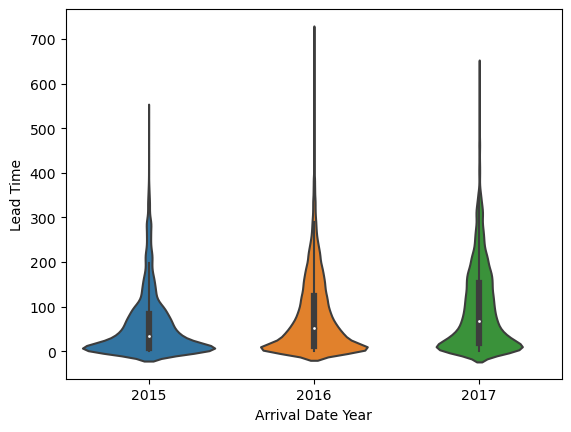

In [87]:
sns.violinplot(data=df, x='Arrival Date Year', y='Lead Time')
plt.show()

In [88]:
# Lead Time & Average Daily Rate by object
def lead_time_avg_dly_rate_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    plt.scatter(df_filtered[COL_NAME_LEAD_TIME], df_filtered[COL_NAME_AVG_DLY_RATE], color='#86bf91', alpha=0.7)
    plt.xlabel(COL_NAME_LEAD_TIME)
    plt.ylabel(COL_NAME_AVG_DLY_RATE)
    plt.title(f'Scatter plot of {COL_NAME_LEAD_TIME} and {COL_NAME_AVG_DLY_RATE} by {desc} ({obj})')
    plt.grid(alpha=0.3)
    plt.show()

In [89]:
draw_cht('All', year_dropdown, lead_time_avg_dly_rate_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [90]:
draw_cht('All', mkt_seg_dropdown, lead_time_avg_dly_rate_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [91]:
draw_cht('All', cust_type_dropdown, lead_time_avg_dly_rate_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)

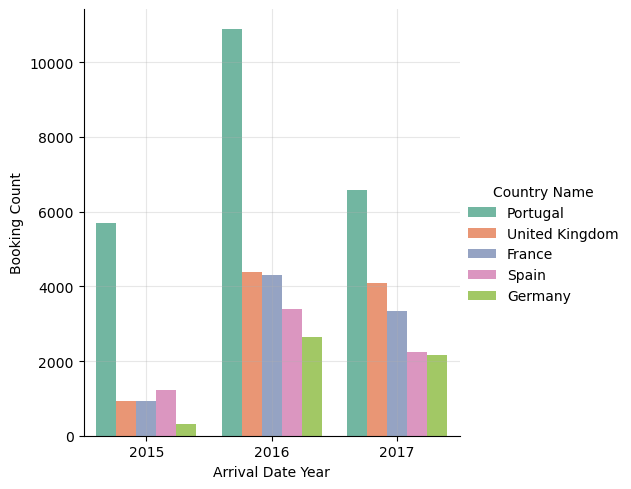

In [102]:
sns.catplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_CNTRY_NAME,
            data=merged_df[merged_df[COL_NAME_CNTRY_NAME].isin(merged_df.groupby(COL_NAME_CNTRY_NAME).size().sort_values(ascending=False).head(5).index)][[COL_NAME_ARR_DATE_Y, COL_NAME_CNTRY_NAME]].groupby([COL_NAME_ARR_DATE_Y, COL_NAME_CNTRY_NAME]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            kind='bar',
            palette='Set2')
# plt.title(f'Top 10 Countries by booking count for each {COL_NAME_HTL} by {desc} ({obj})')
plt.grid(alpha=0.3)
plt.show()

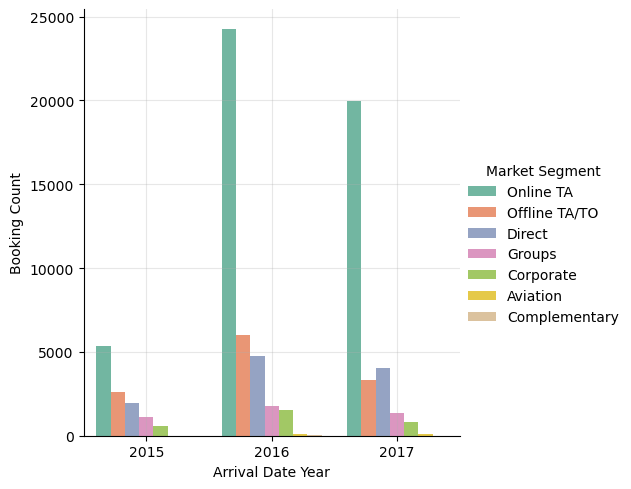

In [93]:
sns.catplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_MKT_SEG,
            data=df.groupby([COL_NAME_ARR_DATE_Y, COL_NAME_MKT_SEG]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            kind='bar',
            palette='Set2')
# plt.title(f'Booking count of {COL_NAME_HTL} and {COL_NAME_MKT_SEG} by {desc} ({obj})')
plt.grid(alpha=0.3)
plt.show()

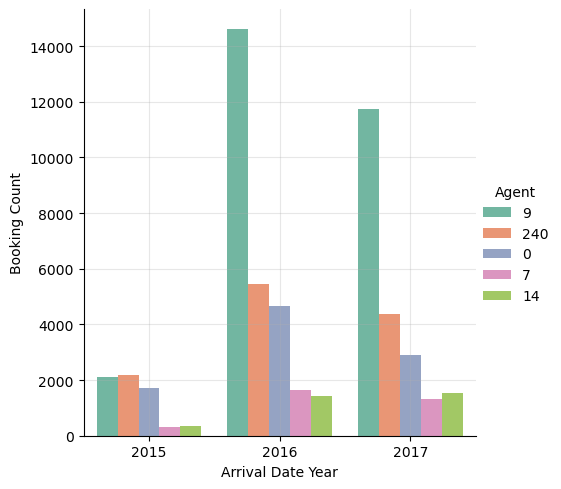

In [103]:
sns.catplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_AGT,
            data=df[df[COL_NAME_AGT].isin(df.groupby(COL_NAME_AGT).size().sort_values(ascending=False).head(5).index)][[COL_NAME_ARR_DATE_Y, COL_NAME_AGT]].groupby([COL_NAME_ARR_DATE_Y, COL_NAME_AGT]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            kind='bar',
            palette='Set2')
# plt.title(f'Top 10 Countries by booking count for each {COL_NAME_HTL} by {desc} ({obj})')
plt.grid(alpha=0.3)
plt.show()

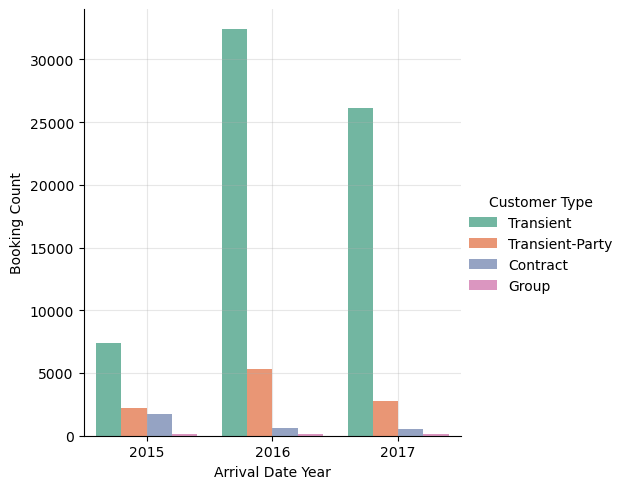

In [104]:
sns.catplot(x=COL_NAME_ARR_DATE_Y,
            y='Booking Count',
            hue=COL_NAME_CUST_TYPE,
            data=df.groupby([COL_NAME_ARR_DATE_Y, COL_NAME_CUST_TYPE]).size().sort_values(ascending=False).reset_index(name='Booking Count'),
            kind='bar',
            palette='Set2')
# plt.title(f'Booking count of {COL_NAME_HTL} and {COL_NAME_MKT_SEG} by {desc} ({obj})')
plt.grid(alpha=0.3)
plt.show()

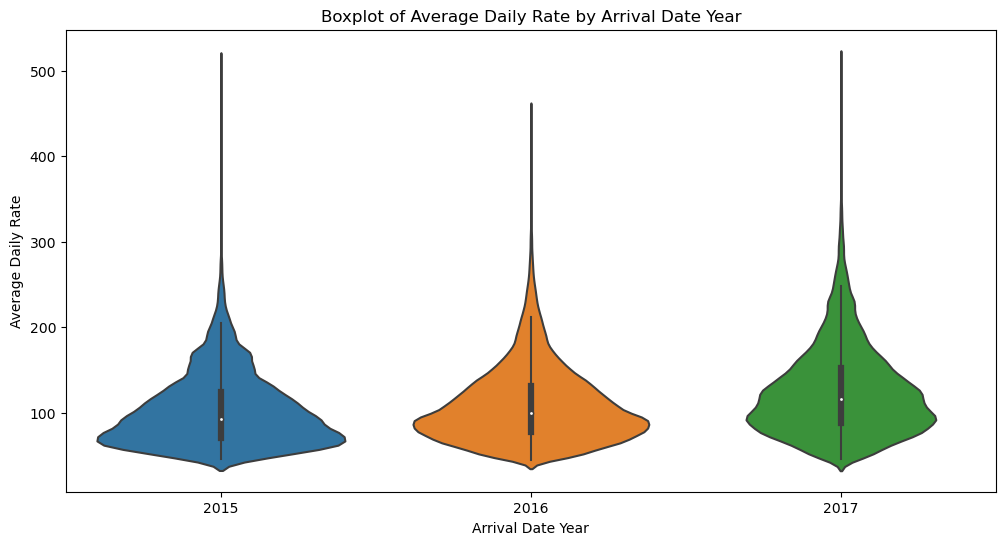

In [108]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Arrival Date Year', y='Average Daily Rate', data=df, order=[2015, 2016, 2017])
plt.title('Boxplot of Average Daily Rate by Arrival Date Year')
plt.show()


In [95]:
# Hotel & Lead Time & Average Daily Rate by object
def htl_lead_time_avg_dly_rate_by_obj(obj, col_name, desc):
    if obj == 'All':
        df_filtered = df
    else:
        df_filtered = df[df[col_name] == obj]
    for i, hotel in enumerate(df_filtered[COL_NAME_HTL].unique()):
        subset = df_filtered[df_filtered[COL_NAME_HTL] == hotel]
        plt.scatter(subset[COL_NAME_LEAD_TIME], subset[COL_NAME_AVG_DLY_RATE], c=['#E99675', '#72B6A1'][i], alpha=0.7, label=hotel)
    plt.xlabel(COL_NAME_LEAD_TIME)
    plt.ylabel(COL_NAME_AVG_DLY_RATE)
    plt.title(f'Scatter plot of {COL_NAME_LEAD_TIME} and {COL_NAME_AVG_DLY_RATE} with {COL_NAME_HTL} by {desc} ({obj})')
    plt.legend(loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()

In [96]:
draw_cht('All', year_dropdown, htl_lead_time_avg_dly_rate_by_obj, COL_NAME_ARR_DATE_Y, 'Year')

In [97]:
draw_cht('All', mkt_seg_dropdown, htl_lead_time_avg_dly_rate_by_obj, COL_NAME_MKT_SEG, COL_NAME_MKT_SEG)

In [98]:
draw_cht('All', cust_type_dropdown, htl_lead_time_avg_dly_rate_by_obj, COL_NAME_CUST_TYPE, COL_NAME_CUST_TYPE)